# Climate Analysis

Choose a start date and end date for your trip. 

Make sure that your vacation range is approximately 3-15 days total.

Use SQLAlchemy create_engine to connect to your sqlite database.

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [92]:
#First import dependencies

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import text
from sqlalchemy import desc
from sqlalchemy import func

In [2]:

# create engine# create 
engine = create_engine('sqlite:///hawaii.sqlite')

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measure', 'station', 'stations']

In [4]:
# map station class
Station = Base.classes.stations

In [5]:

# map measurement class# map me 
Measurement = Base.classes.measure

In [7]:
session = Session(bind=engine)

# Precipitation Analysis

In [51]:
precip_data = session.query(Measurement).first()
precip_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x127766668>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [58]:
prcp_df.count()

date    1190
prcp    1190
dtype: int64

In [59]:
prcp_df.head(5)

,date,prcp
0,2017-05-01,0.26
1,2017-05-02,0.00
2,2017-05-03,0.00
3,2017-05-04,0.00
4,2017-05-05,0.00


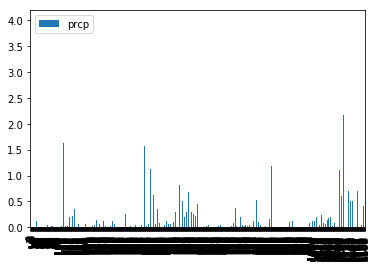

In [60]:
figure1 = prcp_df.plot.bar()


In [61]:
figure1(figsize=(20,1))

TypeError: 'AxesSubplot' object is not callable

# Station Analysis

In [18]:
#get a count of stations
session.query(Station).count()

9

In [19]:
#list stations and observation counts in descending order
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.station)))
for station in station_counts.all():
    print(station)

('USC00519281', 5544)
('USC00513117', 5392)
('USC00519397', 5370)
('USC00519523', 5144)
('USC00516128', 4968)
('USC00514830', 3874)
('USC00511918', 3864)
('USC00517948', 1366)
('USC00518838', 684)


In [20]:
most_observations = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()


most_observations_df = data_frame(most_observations, ['station', 'tobs'])

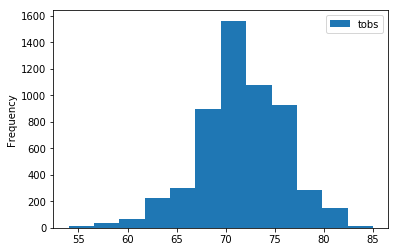

In [21]:
most_observations_df.plot.hist(by='tobs', bins=12)

# Temperature Analysis

In [93]:
def calc_temps(start_date, end_date):
    #create dates 1 year prior
    dates = [start_date, end_date]
    new_dates = []
    for date in dates:
        date_list = date.split("-")
        date_list[0] = str(int(date_list[0]) - 1)
        new_date = "-".join(date_list)
        new_dates.append(new_date)
    print(new_dates) 
    
    #query database for temps from those dates
    temp_values = session.query(Measurement.tobs).filter(Measurement.date >= new_dates[0], Measurement.date <= new_dates[1]).all()
    temp_values_list = [x for (x,) in temp_values]
    avg_temp = np.mean(temp_values_list)
    max_temp = max(temp_values_list)
    min_temp = min(temp_values_list)
    
    # create bar graph
    plt.figure(figsize=(2,5))
    plt.title("Trip Average Temp")
    plt.ylabel("Temperature (F)")
    plt.bar(1, avg_temp, yerr = (max_temp - min_temp), tick_label = "")
    plt.show()

['2017-05-10', '2017-06-12']


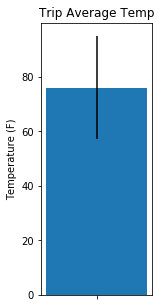

In [96]:
calc_temps('2018-05-10', '2018-06-')